In [ ]:
#data processing and visualization
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
 

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError


#scikit-learn
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import export_graphviz 
from sklearn.preprocessing import LabelEncoder


#regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as XGBRegressor
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

#evaluation matrices
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt
from sklearn.metrics import log_loss , accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score



import warnings
warnings.simplefilter('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df

date store_id  category_id    target  onpromotion  \
0         365  store_1  category_24     0.000            0   
1         365  store_1  category_21     0.000            0   
2         365  store_1  category_32     0.000            0   
3         365  store_1  category_18     0.000            0   
4         365  store_1  category_26     0.000            0   
...       ...      ...          ...       ...          ...   
2248879  1626  store_9  category_23   539.725            0   
2248880  1626  store_9  category_20    84.177            0   
2248881  1626  store_9  category_15  1973.760            3   
2248882  1626  store_9  category_29     2.000            0   
2248883  1626  store_9  category_10    27.076            0   

         nbr_of_transactions  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
...                      ...  
2248879               2141.0  
2248880               2141.0  
2248881               2141.0  
2248882               2141.0  
2248883               2141.0  

[2248884 rows x 6 columns]

In [ ]:
train_df.store_id.value_counts()

store_1     41646
store_46    41646
store_36    41646
store_37    41646
store_38    41646
store_39    41646
store_4     41646
store_40    41646
store_41    41646
store_42    41646
store_43    41646
store_44    41646
store_45    41646
store_47    41646
store_10    41646
store_48    41646
store_49    41646
store_5     41646
store_50    41646
store_51    41646
store_52    41646
store_53    41646
store_54    41646
store_6     41646
store_7     41646
store_8     41646
store_35    41646
store_34    41646
store_33    41646
store_32    41646
store_11    41646
store_12    41646
store_13    41646
store_14    41646
store_15    41646
store_16    41646
store_17    41646
store_18    41646
store_19    41646
store_2     41646
store_20    41646
store_21    41646
store_22    41646
store_23    41646
store_24    41646
store_25    41646
store_26    41646
store_27    41646
store_28    41646
store_29    41646
store_3     41646
store_30    41646
store_31    41646
store_9     41646
Name: store_id, dtype: int64

In [ ]:
train_df.date.value_counts()


365     1782
1203    1782
1210    1782
1209    1782
1208    1782
        ... 
785     1782
784     1782
783     1782
782     1782
1626    1782
Name: date, Length: 1262, dtype: int64

In [ ]:
train_df.category_id.unique()

array(['category_24', 'category_21', 'category_32', 'category_18',
       'category_26', 'category_17', 'category_3', 'category_9',
       'category_14', 'category_4', 'category_16', 'category_19',
       'category_7', 'category_27', 'category_1', 'category_0',
       'category_28', 'category_5', 'category_31', 'category_2',
       'category_25', 'category_22', 'category_8', 'category_6',
       'category_12', 'category_13', 'category_11', 'category_30',
       'category_23', 'category_20', 'category_15', 'category_29',
       'category_10'], dtype=object)

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df

date store_id  category_id  onpromotion
0      1627  store_1  category_24            0
1      1627  store_1  category_21            0
2      1627  store_1  category_32            0
3      1627  store_1  category_18           16
4      1627  store_1  category_26            0
...     ...      ...          ...          ...
99787  1682  store_9  category_23            0
99788  1682  store_9  category_20            1
99789  1682  store_9  category_15            7
99790  1682  store_9  category_29            8
99791  1682  store_9  category_10            0

[99792 rows x 4 columns]

In [ ]:
test_df.store_id.value_counts()

store_1     1848
store_46    1848
store_36    1848
store_37    1848
store_38    1848
store_39    1848
store_4     1848
store_40    1848
store_41    1848
store_42    1848
store_43    1848
store_44    1848
store_45    1848
store_47    1848
store_10    1848
store_48    1848
store_49    1848
store_5     1848
store_50    1848
store_51    1848
store_52    1848
store_53    1848
store_54    1848
store_6     1848
store_7     1848
store_8     1848
store_35    1848
store_34    1848
store_33    1848
store_32    1848
store_11    1848
store_12    1848
store_13    1848
store_14    1848
store_15    1848
store_16    1848
store_17    1848
store_18    1848
store_19    1848
store_2     1848
store_20    1848
store_21    1848
store_22    1848
store_23    1848
store_24    1848
store_25    1848
store_26    1848
store_27    1848
store_28    1848
store_29    1848
store_3     1848
store_30    1848
store_31    1848
store_9     1848
Name: store_id, dtype: int64

In [ ]:
dates_df = pd.read_csv('/content/dates.csv')
dates_df

date  year  month  dayofmonth  dayofweek  dayofyear  weekofyear  \
0      365     1      1           1          2          1           1   
1      366     1      1           2          3          2           1   
2      367     1      1           3          4          3           1   
3      368     1      1           4          5          4           1   
4      369     1      1           5          6          5           1   
...    ...   ...    ...         ...        ...        ...         ...   
1315  1680     4      8          11          4        223          32   
1316  1681     4      8          12          5        224          32   
1317  1682     4      8          13          6        225          32   
1318  1683     4      8          14          0        226          33   
1319  1684     4      8          15          1        227          33   

      quarter  is_month_start  is_month_end  is_quarter_start  is_quarter_end  \
0           1            True         False              True           False   
1           1           False         False             False           False   
2           1           False         False             False           False   
3           1           False         False             False           False   
4           1           False         False             False           False   
...       ...             ...           ...               ...             ...   
1315        3           False         False             False           False   
1316        3           False         False             False           False   
1317        3           False         False             False           False   
1318        3           False         False             False           False   
1319        3           False         False             False           False   

      is_year_start  is_year_end  year_weekofyear  
0              True        False              101  
1             False        False              101  
2             False        False              101  
3             False        False              101  
4             False        False              101  
...             ...          ...              ...  
1315          False        False              432  
1316          False        False              432  
1317          False        False              432  
1318          False        False              433  
1319          False        False              433  

[1320 rows x 15 columns]

In [ ]:
dates_df.date.value_counts()


365     1
1251    1
1249    1
1248    1
1247    1
       ..
804     1
803     1
802     1
801     1
1684    1
Name: date, Length: 1320, dtype: int64

In [ ]:
filtered_data = dates_df[dates_df["date"]==540]
filtered_data

date  year  month  dayofmonth  dayofweek  dayofyear  weekofyear  quarter  \
175   540     1      6          25          2        176          26        2   

     is_month_start  is_month_end  is_quarter_start  is_quarter_end  \
175           False         False             False           False   

     is_year_start  is_year_end  year_weekofyear  
175          False        False              126

In [ ]:
dates_df.value_counts()

date  year  month  dayofmonth  dayofweek  dayofyear  weekofyear  quarter  is_month_start  is_month_end  is_quarter_start  is_quarter_end  is_year_start  is_year_end  year_weekofyear
365   1     1      1           2          1          1           1        True            False         True              False           True           False        101                1
1251  3     6      7           1          159        23          2        False           False         False             False           False          False        323                1
1249  3     6      5           6          157        22          2        False           False         False             False           False          False        322                1
1248  3     6      4           5          156        22          2        False           False         False             False           False          False        322                1
1247  3     6      3           4          155        22          2    

In [ ]:
dates_df.quarter.unique()

array([1, 2, 3, 4])

In [ ]:
holidays_df = pd.read_csv('/content/holidays.csv')
holidays_df

date  type
0       1     0
1       5     4
2      12     4
3      42     0
4      43     0
..    ...   ...
276  1663     2
277  1674     0
278  1679     0
279  1680     1
280  1684     0

[281 rows x 2 columns]

In [ ]:
filtered_data = holidays_df[holidays_df["date"]==540]
filtered_data

date  type
68   540     0
69   540     0
70   540     0
71   540     5

In [ ]:
holidays_df.value_counts()

date  type
1633  0       3
176   0       3
1269  0       3
540   0       3
904   0       3
             ..
680   0       1
696   5       1
699   5       1
703   2       1
1684  0       1
Length: 264, dtype: int64

In [ ]:
stores_df = pd.read_csv('/content/stores.csv')
stores_df

store_id  city  type  cluster
0    store_1     0     0        0
1    store_2     0     0        0
2    store_3     0     0        1
3    store_4     0     0        2
4    store_5     1     0        3
5    store_6     0     0        0
6    store_7     0     0        1
7    store_8     0     0        1
8    store_9     0     1        4
9   store_10     0     2        5
10  store_11     2     1        4
11  store_12     3     2        5
12  store_13     3     2        5
13  store_14     4     2        6
14  store_15     5     2        5
15  store_16     1     2        7
16  store_17     0     2        8
17  store_18     0     1        9
18  store_19     6     2        5
19  store_20     0     1        4
20  store_21     1     1        4
21  store_22     7     2        6
22  store_23     8     0        2
23  store_24     9     0       10
24  store_25    10     0       10
25  store_26     9     0       11
26  store_27    11     0       10
27  store_28     9     3       11
28  store_29     9     3       11
29  store_30     9     2        7
30  store_31    12     1       11
31  store_32     9     2        7
32  store_33    13     2        7
33  store_34     9     1        4
34  store_35    14     2        7
35  store_36    15     3       11
36  store_37    16     0       12
37  store_38    17     0        3
38  store_39    16     1        4
39  store_40    18     2        7
40  store_41    18     0        3
41  store_42    16     0       12
42  store_43    19     3       11
43  store_44     0     4       13
44  store_45     0     4       14
45  store_46     0     4       15
46  store_47     0     4       15
47  store_48     0     4       15
48  store_49     0     4       14
49  store_50     8     4       15
50  store_51     9     4       16
51  store_52    20     4       14
52  store_53    20     0        0
53  store_54    21     2        7

In [ ]:
SampleSubmission = pd.read_csv('/content/SampleSubmission.csv')
SampleSubmission

ID  target
0      year_week_425_store_1_category_0       0
1      year_week_426_store_1_category_0       0
2      year_week_427_store_1_category_0       1
3      year_week_428_store_1_category_0       3
4      year_week_429_store_1_category_0       2
...                                 ...     ...
14251  year_week_428_store_9_category_9       0
14252  year_week_429_store_9_category_9       1
14253  year_week_430_store_9_category_9       0
14254  year_week_431_store_9_category_9       1
14255  year_week_432_store_9_category_9       0

[14256 rows x 2 columns]

In [ ]:
train_df.sort_values(by=['date'])

date  store_id  category_id   target  onpromotion  \
0         365   store_1  category_24    0.000            0   
1194      365  store_42   category_3    0.000            0   
1193      365  store_42  category_17    0.000            0   
1192      365  store_42  category_26    0.000            0   
1191      365  store_42  category_18    0.000            0   
...       ...       ...          ...      ...          ...   
2247689  1626  store_25  category_11    0.000            0   
2247688  1626  store_25  category_13   93.000            4   
2247687  1626  store_25  category_12  149.435           38   
2247698  1626  store_26  category_32    2.000            0   
2248883  1626   store_9  category_10   27.076            0   

         nbr_of_transactions  
0                        0.0  
1194                     0.0  
1193                     0.0  
1192                     0.0  
1191                     0.0  
...                      ...  
2247689                859.0  
2247688                859.0  
2247687                859.0  
2247698                632.0  
2248883               2141.0  

[2248884 rows x 6 columns]

In [ ]:
train_df.sort_values(by=['date'])

date  store_id  category_id   target  onpromotion  \
0         365   store_1  category_24    0.000            0   
1194      365  store_42   category_3    0.000            0   
1193      365  store_42  category_17    0.000            0   
1192      365  store_42  category_26    0.000            0   
1191      365  store_42  category_18    0.000            0   
...       ...       ...          ...      ...          ...   
2247689  1626  store_25  category_11    0.000            0   
2247688  1626  store_25  category_13   93.000            4   
2247687  1626  store_25  category_12  149.435           38   
2247698  1626  store_26  category_32    2.000            0   
2248883  1626   store_9  category_10   27.076            0   

         nbr_of_transactions  
0                        0.0  
1194                     0.0  
1193                     0.0  
1192                     0.0  
1191                     0.0  
...                      ...  
2247689                859.0  
2247688                859.0  
2247687                859.0  
2247698                632.0  
2248883               2141.0  

[2248884 rows x 6 columns]

In [ ]:
test_df.sort_values(by=['date'])

date  store_id  category_id  onpromotion
0      1627   store_1  category_24            0
1194   1627  store_42   category_3            0
1193   1627  store_42  category_17            0
1192   1627  store_42  category_26            0
1191   1627  store_42  category_18           18
...     ...       ...          ...          ...
98597  1682  store_25  category_11            0
98596  1682  store_25  category_13            6
98595  1682  store_25  category_12            0
98606  1682  store_26  category_32            0
99791  1682   store_9  category_10            0

[99792 rows x 4 columns]

In [ ]:
# train and dates
train_df = train_df.merge(dates_df, how='left', on="date")

# test and dates
test_df = test_df.merge(dates_df, how='left', on="date")

# train and stores_df
train_df = train_df.merge(stores_df, how='left', on="store_id")

# test and stores_df
test_df = test_df.merge(stores_df, how='left', on="store_id")

In [ ]:
train_df

date store_id  category_id    target  onpromotion  \
0         365  store_1  category_24     0.000            0   
1         365  store_1  category_21     0.000            0   
2         365  store_1  category_32     0.000            0   
3         365  store_1  category_18     0.000            0   
4         365  store_1  category_26     0.000            0   
...       ...      ...          ...       ...          ...   
2248879  1626  store_9  category_23   539.725            0   
2248880  1626  store_9  category_20    84.177            0   
2248881  1626  store_9  category_15  1973.760            3   
2248882  1626  store_9  category_29     2.000            0   
2248883  1626  store_9  category_10    27.076            0   

         nbr_of_transactions  year  month  dayofmonth  dayofweek  ...  \
0                        0.0     1      1           1          2  ...   
1                        0.0     1      1           1          2  ...   
2                        0.0     1      1           1          2  ...   
3                        0.0     1      1           1          2  ...   
4                        0.0     1      1           1          2  ...   
...                      ...   ...    ...         ...        ...  ...   
2248879               2141.0     4      6          18          6  ...   
2248880               2141.0     4      6          18          6  ...   
2248881               2141.0     4      6          18          6  ...   
2248882               2141.0     4      6          18          6  ...   
2248883               2141.0     4      6          18          6  ...   

         is_month_start  is_month_end  is_quarter_start  is_quarter_end  \
0                  True         False              True           False   
1                  True         False              True           False   
2                  True         False              True           False   
3                  True         False              True           False   
4                  True         False              True           False   
...                 ...           ...               ...             ...   
2248879           False         False             False           False   
2248880           False         False             False           False   
2248881           False         False             False           False   
2248882           False         False             False           False   
2248883           False         False             False           False   

         is_year_start  is_year_end  year_weekofyear  city  type  cluster  
0                 True        False              101     0     0        0  
1                 True        False              101     0     0        0  
2                 True        False              101     0     0        0  
3                 True        False              101     0     0        0  
4                 True        False              101     0     0        0  
...                ...          ...              ...   ...   ...      ...  
2248879          False        False              424     0     1        4  
2248880          False        False              424     0     1        4  
2248881          False        False              424     0     1        4  
2248882          False        False              424     0     1        4  
2248883          False        False              424     0     1        4  

[2248884 rows x 23 columns]

In [ ]:
dates_df.sort_values(by=['date'])

date  year  month  dayofmonth  dayofweek  dayofyear  weekofyear  \
0      365     1      1           1          2          1           1   
1      366     1      1           2          3          2           1   
2      367     1      1           3          4          3           1   
3      368     1      1           4          5          4           1   
4      369     1      1           5          6          5           1   
...    ...   ...    ...         ...        ...        ...         ...   
1315  1680     4      8          11          4        223          32   
1316  1681     4      8          12          5        224          32   
1317  1682     4      8          13          6        225          32   
1318  1683     4      8          14          0        226          33   
1319  1684     4      8          15          1        227          33   

      quarter  is_month_start  is_month_end  is_quarter_start  is_quarter_end  \
0           1            True         False              True           False   
1           1           False         False             False           False   
2           1           False         False             False           False   
3           1           False         False             False           False   
4           1           False         False             False           False   
...       ...             ...           ...               ...             ...   
1315        3           False         False             False           False   
1316        3           False         False             False           False   
1317        3           False         False             False           False   
1318        3           False         False             False           False   
1319        3           False         False             False           False   

      is_year_start  is_year_end  year_weekofyear  
0              True        False              101  
1             False        False              101  
2             False        False              101  
3             False        False              101  
4             False        False              101  
...             ...          ...              ...  
1315          False        False              432  
1316          False        False              432  
1317          False        False              432  
1318          False        False              433  
1319          False        False              433  

[1320 rows x 15 columns]

In [ ]:
train_df['is_month_start'] = train_df['is_month_start'].astype(int)               
train_df['is_month_end'] = train_df['is_month_end'].astype(int)
train_df['is_quarter_start'] = train_df['is_quarter_start'].astype(int)  
train_df['is_quarter_end'] = train_df['is_quarter_end'].astype(int)  
train_df['is_year_start'] = train_df['is_year_start'].astype(int)  
train_df['is_year_end'] = train_df['is_year_end'].astype(int)  


In [ ]:
test_df['is_month_start'] = test_df['is_month_start'].astype(int)               
test_df['is_month_end'] = test_df['is_month_end'].astype(int)
test_df['is_quarter_start'] = test_df['is_quarter_start'].astype(int)  
test_df['is_quarter_end'] = test_df['is_quarter_end'].astype(int)  
test_df['is_year_start'] = test_df['is_year_start'].astype(int)  
test_df['is_year_end'] = test_df['is_year_end'].astype(int)  
 

In [ ]:
train_df

date store_id  category_id    target  onpromotion  \
0         365  store_1  category_24     0.000            0   
1         365  store_1  category_21     0.000            0   
2         365  store_1  category_32     0.000            0   
3         365  store_1  category_18     0.000            0   
4         365  store_1  category_26     0.000            0   
...       ...      ...          ...       ...          ...   
2248879  1626  store_9  category_23   539.725            0   
2248880  1626  store_9  category_20    84.177            0   
2248881  1626  store_9  category_15  1973.760            3   
2248882  1626  store_9  category_29     2.000            0   
2248883  1626  store_9  category_10    27.076            0   

         nbr_of_transactions  year  month  dayofmonth  dayofweek  ...  \
0                        0.0     1      1           1          2  ...   
1                        0.0     1      1           1          2  ...   
2                        0.0     1      1           1          2  ...   
3                        0.0     1      1           1          2  ...   
4                        0.0     1      1           1          2  ...   
...                      ...   ...    ...         ...        ...  ...   
2248879               2141.0     4      6          18          6  ...   
2248880               2141.0     4      6          18          6  ...   
2248881               2141.0     4      6          18          6  ...   
2248882               2141.0     4      6          18          6  ...   
2248883               2141.0     4      6          18          6  ...   

         is_month_start  is_month_end  is_quarter_start  is_quarter_end  \
0                     1             0                 1               0   
1                     1             0                 1               0   
2                     1             0                 1               0   
3                     1             0                 1               0   
4                     1             0                 1               0   
...                 ...           ...               ...             ...   
2248879               0             0                 0               0   
2248880               0             0                 0               0   
2248881               0             0                 0               0   
2248882               0             0                 0               0   
2248883               0             0                 0               0   

         is_year_start  is_year_end  year_weekofyear  city  type  cluster  
0                    1            0              101     0     0        0  
1                    1            0              101     0     0        0  
2                    1            0              101     0     0        0  
3                    1            0              101     0     0        0  
4                    1            0              101     0     0        0  
...                ...          ...              ...   ...   ...      ...  
2248879              0            0              424     0     1        4  
2248880              0            0              424     0     1        4  
2248881              0            0              424     0     1        4  
2248882              0            0              424     0     1        4  
2248883              0            0              424     0     1        4  

[2248884 rows x 23 columns]

In [ ]:
test_df

date store_id  category_id  onpromotion  year  month  dayofmonth  \
0      1627  store_1  category_24            0     4      6          19   
1      1627  store_1  category_21            0     4      6          19   
2      1627  store_1  category_32            0     4      6          19   
3      1627  store_1  category_18           16     4      6          19   
4      1627  store_1  category_26            0     4      6          19   
...     ...      ...          ...          ...   ...    ...         ...   
99787  1682  store_9  category_23            0     4      8          13   
99788  1682  store_9  category_20            1     4      8          13   
99789  1682  store_9  category_15            7     4      8          13   
99790  1682  store_9  category_29            8     4      8          13   
99791  1682  store_9  category_10            0     4      8          13   

       dayofweek  dayofyear  weekofyear  ...  is_month_start  is_month_end  \
0              0        170          25  ...               0             0   
1              0        170          25  ...               0             0   
2              0        170          25  ...               0             0   
3              0        170          25  ...               0             0   
4              0        170          25  ...               0             0   
...          ...        ...         ...  ...             ...           ...   
99787          6        225          32  ...               0             0   
99788          6        225          32  ...               0             0   
99789          6        225          32  ...               0             0   
99790          6        225          32  ...               0             0   
99791          6        225          32  ...               0             0   

       is_quarter_start  is_quarter_end  is_year_start  is_year_end  \
0                     0               0              0            0   
1                     0               0              0            0   
2                     0               0              0            0   
3                     0               0              0            0   
4                     0               0              0            0   
...                 ...             ...            ...          ...   
99787                 0               0              0            0   
99788                 0               0              0            0   
99789                 0               0              0            0   
99790                 0               0              0            0   
99791                 0               0              0            0   

       year_weekofyear  city  type  cluster  
0                  425     0     0        0  
1                  425     0     0        0  
2                  425     0     0        0  
3                  425     0     0        0  
4                  425     0     0        0  
...                ...   ...   ...      ...  
99787              432     0     1        4  
99788              432     0     1        4  
99789              432     0     1        4  
99790              432     0     1        4  
99791              432     0     1        4  

[99792 rows x 21 columns]

In [ ]:
train_df['store_id'] = train_df['store_id'].str[6:]
train_df['category_id'] = train_df['category_id'].str[9:]


In [ ]:
test_df['store_id'] = test_df['store_id'].str[6:]
test_df['category_id'] = test_df['category_id'].str[9:]

In [ ]:
train_df['store_id'] = train_df['store_id'].astype(int)
test_df['store_id'] = test_df['store_id'].astype(int)

In [ ]:
train_df['category_id'] = train_df['category_id'].astype(int)
test_df['category_id'] = test_df['category_id'].astype(int)

In [ ]:
train_df.drop(labels='date', axis=1, inplace=True)
test_df.drop(labels='date', axis=1, inplace=True)

In [ ]:
train_df.drop(labels='nbr_of_transactions', axis=1, inplace=True)

In [ ]:
'''train_df.drop(labels='dayofmonth', axis=1, inplace=True)
train_df.drop(labels='dayofweek', axis=1, inplace=True)
train_df.drop(labels='is_month_start', axis=1, inplace=True)
train_df.drop(labels='is_year_start', axis=1, inplace=True)
train_df.drop(labels='city', axis=1, inplace=True)'''


"train_df.drop(labels='dayofmonth', axis=1, inplace=True)\ntrain_df.drop(labels='dayofweek', axis=1, inplace=True)\ntrain_df.drop(labels='is_month_start', axis=1, inplace=True)\ntrain_df.drop(labels='is_year_start', axis=1, inplace=True)\ntrain_df.drop(labels='city', axis=1, inplace=True)"

In [ ]:
'''train_df.drop(labels='is_quarter_start', axis=1, inplace=True)'''


"train_df.drop(labels='is_quarter_start', axis=1, inplace=True)"

In [ ]:
'''test_df.drop(labels='dayofmonth', axis=1, inplace=True)
test_df.drop(labels='dayofweek', axis=1, inplace=True)
test_df.drop(labels='is_month_start', axis=1, inplace=True)
test_df.drop(labels='is_year_start', axis=1, inplace=True)
test_df.drop(labels='city', axis=1, inplace=True)'''


"test_df.drop(labels='dayofmonth', axis=1, inplace=True)\ntest_df.drop(labels='dayofweek', axis=1, inplace=True)\ntest_df.drop(labels='is_month_start', axis=1, inplace=True)\ntest_df.drop(labels='is_year_start', axis=1, inplace=True)\ntest_df.drop(labels='city', axis=1, inplace=True)"

In [ ]:
'''test_df.drop(labels='is_quarter_start', axis=1, inplace=True)'''


"test_df.drop(labels='is_quarter_start', axis=1, inplace=True)"

In [ ]:
train_df.sort_values(by=['store_id', 'category_id','year','weekofyear','dayofyear','month'])


store_id  category_id  target  onpromotion  year  month  dayofmonth  \
15              1            0     0.0            0     1      1           1   
1797            1            0    10.0            0     1      1           2   
3579            1            0     3.0            0     1      1           3   
5361            1            0    14.0            0     1      1           4   
7143            1            0     7.0            0     1      1           5   
...           ...          ...     ...          ...   ...    ...         ...   
2243375        54           32     4.0            1     4      6          15   
2245157        54           32     4.0            2     4      6          16   
2246939        54           32     2.0            2     4      6          17   
2248721        54           32     0.0            0     4      6          18   
1949345        54           32     0.0            0     4      1           1   

         dayofweek  dayofyear  weekofyear  ...  is_month_start  is_month_end  \
15               2          1           1  ...               1             0   
1797             3          2           1  ...               0             0   
3579             4          3           1  ...               0             0   
5361             5          4           1  ...               0             0   
7143             6          5           1  ...               0             0   
...            ...        ...         ...  ...             ...           ...   
2243375          3        166          24  ...               0             0   
2245157          4        167          24  ...               0             0   
2246939          5        168          24  ...               0             0   
2248721          6        169          24  ...               0             0   
1949345          6          1          52  ...               1             0   

         is_quarter_start  is_quarter_end  is_year_start  is_year_end  \
15                      1               0              1            0   
1797                    0               0              0            0   
3579                    0               0              0            0   
5361                    0               0              0            0   
7143                    0               0              0            0   
...                   ...             ...            ...          ...   
2243375                 0               0              0            0   
2245157                 0               0              0            0   
2246939                 0               0              0            0   
2248721                 0               0              0            0   
1949345                 1               0              1            0   

         year_weekofyear  city  type  cluster  
15                   101     0     0        0  
1797                 101     0     0        0  
3579                 101     0     0        0  
5361                 101     0     0        0  
7143                 101     0     0        0  
...                  ...   ...   ...      ...  
2243375              424    21     2        7  
2245157              424    21     2        7  
2246939              424    21     2        7  
2248721              424    21     2        7  
1949345              352    21     2        7  

[2248884 rows x 21 columns]

In [ ]:
test_df.sort_values(by=['store_id', 'category_id','year','weekofyear','dayofyear','month'])

store_id  category_id  onpromotion  year  month  dayofmonth  dayofweek  \
15            1            0            4     4      6          19          0   
1797          1            0            2     4      6          20          1   
3579          1            0            1     4      6          21          2   
5361          1            0            1     4      6          22          3   
7143          1            0            1     4      6          23          4   
...         ...          ...          ...   ...    ...         ...        ...   
92501        54           32            0     4      8           9          2   
94283        54           32            0     4      8          10          3   
96065        54           32            0     4      8          11          4   
97847        54           32            0     4      8          12          5   
99629        54           32            0     4      8          13          6   

       dayofyear  weekofyear  quarter  is_month_start  is_month_end  \
15           170          25        2               0             0   
1797         171          25        2               0             0   
3579         172          25        2               0             0   
5361         173          25        2               0             0   
7143         174          25        2               0             0   
...          ...         ...      ...             ...           ...   
92501        221          32        3               0             0   
94283        222          32        3               0             0   
96065        223          32        3               0             0   
97847        224          32        3               0             0   
99629        225          32        3               0             0   

       is_quarter_start  is_quarter_end  is_year_start  is_year_end  \
15                    0               0              0            0   
1797                  0               0              0            0   
3579                  0               0              0            0   
5361                  0               0              0            0   
7143                  0               0              0            0   
...                 ...             ...            ...          ...   
92501                 0               0              0            0   
94283                 0               0              0            0   
96065                 0               0              0            0   
97847                 0               0              0            0   
99629                 0               0              0            0   

       year_weekofyear  city  type  cluster  
15                 425     0     0        0  
1797               425     0     0        0  
3579               425     0     0        0  
5361               425     0     0        0  
7143               425     0     0        0  
...                ...   ...   ...      ...  
92501              432    21     2        7  
94283              432    21     2        7  
96065              432    21     2        7  
97847              432    21     2        7  
99629              432    21     2        7  

[99792 rows x 20 columns]

In [ ]:
train_df=train_df.groupby(['store_id', 'category_id','year','weekofyear']).agg([np.mean])
train_df
train_df = train_df.round()
train_df = train_df.astype(int)
train_df

target onpromotion month dayofmonth  \
                                       mean        mean  mean       mean   
store_id category_id year weekofyear                                       
1        0           1    1              17           0     5         13   
                          2              16           0     1          9   
                          3              16           0     1         16   
                          4              13           0     1         23   
                          5              22           0     1         21   
...                                     ...         ...   ...        ...   
54       32          4    21              2           1     5         25   
                          22              2           1     6         14   
                          23              1           1     6          8   
                          24              2           1     6         15   
                          52              0           0     1          1   

                                     dayofweek dayofyear quarter  \
                                          mean      mean    mean   
store_id category_id year weekofyear                               
1        0           1    1                  3       138       2   
                          2                  3         9       1   
                          3                  3        16       1   
                          4                  3        23       1   
                          5                  3        30       1   
...                                        ...       ...     ...   
54       32          4    21                 3       145       2   
                          22                 3       152       2   
                          23                 3       159       2   
                          24                 3       166       2   
                          52                 6         1       1   

                                     is_month_start is_month_end  \
                                               mean         mean   
store_id category_id year weekofyear                               
1        0           1    1                       0            0   
                          2                       0            0   
                          3                       0            0   
                          4                       0            0   
                          5                       0            0   
...                                             ...          ...   
54       32          4    21                      0            0   
                          22                      0            0   
                          23                      0            0   
                          24                      0            0   
                          52                      1            0   

                                     is_quarter_start is_quarter_end  \
                                                 mean           mean   
store_id category_id year weekofyear                                   
1        0           1    1                         0              0   
                          2                         0              0   
                          3                         0              0   
                          4                         0              0   
                          5                         0              0   
...                                               ...            ...   
54       32          4    21                        0              0   
                          22                        0              0   
                          23                        0              0   
                          24                        0              0   
                          52                        1              0   

                                     is_year_start is_yea

In [ ]:
test_df=test_df.groupby(['store_id', 'category_id','year','weekofyear']).agg([np.mean])
test_df
test_df = test_df.round()
test_df = test_df.astype(int)
test_df

onpromotion month dayofmonth dayofweek  \
                                            mean  mean       mean      mean   
store_id category_id year weekofyear                                          
1        0           4    25                   2     6         22         3   
                          26                   3     6         20         3   
                          27                   6     7          6         3   
                          28                   3     7         13         3   
                          29                   4     7         20         3   
...                                          ...   ...        ...       ...   
54       32          4    28                   0     7         13         3   
                          29                   0     7         20         3   
                          30                   0     7         27         3   
                          31                   0     8          7         3   
                          32                   0     8         10         3   

                                     dayofyear quarter is_month_start  \
                                          mean    mean           mean   
store_id category_id year weekofyear                                    
1        0           4    25               173       2              0   
                          26               180       2              0   
                          27               187       3              0   
                          28               194       3              0   
                          29               201       3              0   
...                                        ...     ...            ...   
54       32          4    28               194       3              0   
                          29               201       3              0   
                          30               208       3              0   
                          31               215       3              0   
                          32               222       3              0   

                                     is_month_end is_quarter_start  \
                                             mean             mean   
store_id category_id year weekofyear                                 
1        0           4    25                    0                0   
                          26                    0                0   
                          27                    0                0   
                          28                    0                0   
                          29                    0                0   
...                                           ...              ...   
54       32          4    28                    0                0   
                          29                    0                0   
                          30                    0                0   
                          31                    0                0   
                          32                    0                0   

                                     is_quarter_end is_year_start is_year_end  \
                                               mean          mean        mean   
store_id category_id year weekofyear                                            
1        0           4    25                      0             0           0   
                          26                      0             0           0   
                          27                      0             0           0   
                          28                      0             0           0   
                          29                      0             0           0   
...                                             ...           ...         ...   
54       32          4    28                      0             0           0   
                          29                      0             0           0   
                          30       

In [ ]:
train_df.columns = train_df.columns.get_level_values(0)
test_df.columns = test_df.columns.get_level_values(0)

In [ ]:
train_df.columns

Index(['target', 'onpromotion', 'month', 'dayofmonth', 'dayofweek',
       'dayofyear', 'quarter', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'year_weekofyear', 'city', 'type', 'cluster'],
      dtype='object')

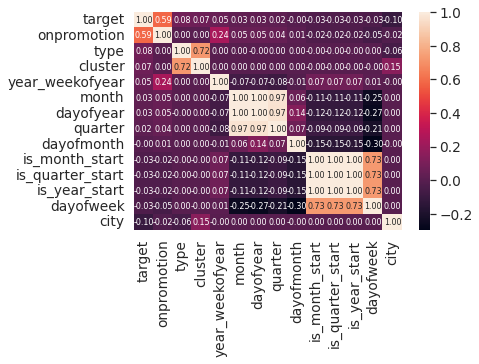

In [ ]:
correlation = train_df.corr()

k = 17
cols = correlation.nlargest(k, 'target')['target'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
'''train_df.drop(labels='cluster', axis=1, inplace=True)
test_df.drop(labels='cluster', axis=1, inplace=True)'''

"train_df.drop(labels='cluster', axis=1, inplace=True)\ntest_df.drop(labels='cluster', axis=1, inplace=True)"

In [ ]:
train_df

target  onpromotion  month  dayofmonth  \
store_id category_id year weekofyear                                           
1        0           1    1               17            0      5          13   
                          2               16            0      1           9   
                          3               16            0      1          16   
                          4               13            0      1          23   
                          5               22            0      1          21   
...                                      ...          ...    ...         ...   
54       32          4    21               2            1      5          25   
                          22               2            1      6          14   
                          23               1            1      6           8   
                          24               2            1      6          15   
                          52               0            0      1           1   

                                      dayofweek  dayofyear  quarter  \
store_id category_id year weekofyear                                  
1        0           1    1                   3        138        2   
                          2                   3          9        1   
                          3                   3         16        1   
                          4                   3         23        1   
                          5                   3         30        1   
...                                         ...        ...      ...   
54       32          4    21                  3        145        2   
                          22                  3        152        2   
                          23                  3        159        2   
                          24                  3        166        2   
                          52                  6          1        1   

                                      is_month_start  is_month_end  \
store_id category_id year weekofyear                                 
1        0           1    1                        0             0   
                          2                        0             0   
                          3                        0             0   
                          4                        0             0   
                          5                        0             0   
...                                              ...           ...   
54       32          4    21                       0             0   
                          22                       0             0   
                          23                       0             0   
                          24                       0             0   
                          52                       1             0   

                                      is_quarter_start  is_quarter_end  \
store_id category_id year weekofyear                                     
1        0           1    1                          0               0   
                          2                          0               0   
                          3                          0               0   
                          4                          0               0   
                          5                          0               0   
...                                                ...             ...   
54       32          4    21                         0               0   
                          22                         0               0   
                          23                         0               0   
                          24                         0               0   
                          52                         1               0   

                                      is_year_start  is_year_end  \
store_id category_id year weekofyear                               
1        0           1    1                       0            

In [ ]:
# log(1+x) transform
train_df["target"] = np.log1p(train_df["target"])

In [ ]:
#splitting data into X_train, X_test, y_train, y_test
training_data = train_df
X = training_data.drop(['target'], axis = 1)
y = training_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(260884, 16) (65222, 16)
(260884,) (65222,)


In [ ]:
test_df

onpromotion  month  dayofmonth  \
store_id category_id year weekofyear                                   
1        0           4    25                    2      6          22   
                          26                    3      6          20   
                          27                    6      7           6   
                          28                    3      7          13   
                          29                    4      7          20   
...                                           ...    ...         ...   
54       32          4    28                    0      7          13   
                          29                    0      7          20   
                          30                    0      7          27   
                          31                    0      8           7   
                          32                    0      8          10   

                                      dayofweek  dayofyear  quarter  \
store_id category_id year weekofyear                                  
1        0           4    25                  3        173        2   
                          26                  3        180        2   
                          27                  3        187        3   
                          28                  3        194        3   
                          29                  3        201        3   
...                                         ...        ...      ...   
54       32          4    28                  3        194        3   
                          29                  3        201        3   
                          30                  3        208        3   
                          31                  3        215        3   
                          32                  3        222        3   

                                      is_month_start  is_month_end  \
store_id category_id year weekofyear                                 
1        0           4    25                       0             0   
                          26                       0             0   
                          27                       0             0   
                          28                       0             0   
                          29                       0             0   
...                                              ...           ...   
54       32          4    28                       0             0   
                          29                       0             0   
                          30                       0             0   
                          31                       0             0   
                          32                       0             0   

                                      is_quarter_start  is_quarter_end  \
store_id category_id year weekofyear                                     
1        0           4    25                         0               0   
                          26                         0               0   
                          27                         0               0   
                          28                         0               0   
                          29                         0               0   
...                                                ...             ...   
54       32          4    28                         0               0   
                          29                         0               0   
                          30                         0               0   
                          31                         0               0   
                          32                         0               0   

                                      is_year_start  is_year_end  \
store_id category_id year weekofyear                               
1        0           4    25                      0            0   
                          26                      0            0   
                          27   

In [ ]:
# Necessary imports

# Instantiation
model = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

 
# Fitting the model
model.fit(X_train, y_train)
 
# Predict the model
pred = model.predict(X_train)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred))
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))


pred_test_model= model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 


KeyboardInterrupt: ignored

In [ ]:
import lightgbm as lgb
# Light Gradient Boosting Regressor
'''lightgbm = lgb.LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
lightgbm.fit(X_train, y_train) '''



# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
xgboost.fit(X_train, y_train) 




decisiontree = DecisionTreeRegressor(random_state = 0)
# Fitting the Decision Tree Regression model to the data
decisiontree.fit(X_train, y_train) 





randomforest = RandomForestRegressor( )
# Fitting the Random Forest Regression model to the data
randomforest.fit(X_train, y_train)






Linearregression = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)

Linearregression.fit(X_train, y_train)





KNN = neighbors.KNeighborsRegressor()

KNN.fit(X_train, y_train) 



ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train) 

[05:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Ridge(alpha=0.01)

In [ ]:
def blended_predictions(X):
    return (( decisiontree.predict(X) + xgboost.predict(X) + Linearregression.predict(X) +  randomforest.predict(X) + Linearregression.predict(X) + + Linearregression.predict(X))/6)

In [ ]:
blended_score = mean_squared_error(y_test, blended_predictions(X_test))
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
3.219095791163141


In [ ]:
pred_test_model= blended_predictions(test_df)

In [ ]:
SampleSubmission

ID  target
0      year_week_425_store_1_category_0       0
1      year_week_426_store_1_category_0       0
2      year_week_427_store_1_category_0       1
3      year_week_428_store_1_category_0       3
4      year_week_429_store_1_category_0       2
...                                 ...     ...
14251  year_week_428_store_9_category_9       0
14252  year_week_429_store_9_category_9       1
14253  year_week_430_store_9_category_9       0
14254  year_week_431_store_9_category_9       1
14255  year_week_432_store_9_category_9       0

[14256 rows x 2 columns]

In [ ]:
SampleSubmission.target = pred_test_model


In [ ]:
SampleSubmission.to_csv('submission55.csv', index=False)

In [ ]:
SampleSubmission

ID    target
0      year_week_425_store_1_category_0  3.646381
1      year_week_426_store_1_category_0  4.108506
2      year_week_427_store_1_category_0  4.820207
3      year_week_428_store_1_category_0  4.107144
4      year_week_429_store_1_category_0  3.877498
...                                 ...       ...
14251  year_week_428_store_9_category_9  1.528679
14252  year_week_429_store_9_category_9  1.525221
14253  year_week_430_store_9_category_9  1.523848
14254  year_week_431_store_9_category_9  1.573437
14255  year_week_432_store_9_category_9  1.562351

[14256 rows x 2 columns]

In [ ]:
submission1 = pd.read_csv('/content/submission7.csv')

In [ ]:
SampleSubmission.target = (SampleSubmission.target +SampleSubmission.target  + submission1.target)/2

In [ ]:
SampleSubmission

ID    target
0      year_week_425_store_1_category_0  7.867756
1      year_week_426_store_1_category_0  8.161512
2      year_week_427_store_1_category_0  8.797899
3      year_week_428_store_1_category_0  8.279951
4      year_week_429_store_1_category_0  8.045664
...                                 ...       ...
14251  year_week_428_store_9_category_9  4.064663
14252  year_week_429_store_9_category_9  4.062934
14253  year_week_430_store_9_category_9  4.062248
14254  year_week_431_store_9_category_9  3.947906
14255  year_week_432_store_9_category_9  3.929058

[14256 rows x 2 columns]

In [ ]:
SampleSubmission.to_csv('submission66.csv', index=False)